# Heart attack probabiity data analyze and modeling

Dataset is about 13 attributes of patient data and 'target' refers to presence of a heart disease of each patient record.

dataset is used from kaggle - https://www.kaggle.com/datasets/nareshbhat/health-care-data-set-on-heart-attack-possibility

## End Goal/Purpose
Main Goal is to analyze data and then make a ml model to predict the probability of having a heart disease.

## Analyzing, Visualizing and Cleaning data
Here we analyze data, visualize, see correlations,decide what column do we need and what we don't need, remove unrelated columns, look for the null/na values or wrong data, treat those data, check outliers, treat the outliers and see if it needs more cleaning.

## Preprocessing
Preprocessing data to feed the model, split data for training, evaluating and testing

## Model
build the model.

## evaluate and test the efficiency
evaluate the model's efficiency and test the data with test dataset manually.

## report
create a report of data and model input shapes, etc.

In [7]:
# imports
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
keras = tf.keras
layers = keras.layers

load the csv

csv link - https://drive.google.com/uc?export=download&id=1hxm56YB__4CIVihum5ugGPow77YN-KRJ

1) age

2) sex (1 = male; 0 = female)

3) chest pain type (4 values)

4) resting blood pressure

5) serum cholestoral in mg/dl

6)fasting blood sugar > 120 mg/dl

7) resting electrocardiographic results (values 0,1,2)

8) maximum heart rate achieved

9) exercise induced angina

10) oldpeak = ST depression induced by exercise relative to rest

11)the slope of the peak exercise ST segment

12) number of major vessels (0-3) colored by flourosopy

13) thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

14) target: 0= less chance of heart attack 1= more chance of heart attack

* Extra info needed

*4 cp/chest pain types are -
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic

*3 resting electrocardiographic results
--Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

source - https://archive.ics.uci.edu/dataset/45/heart+disease

In [3]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1hxm56YB__4CIVihum5ugGPow77YN-KRJ')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


There's only 303 records. and no null values. Amount of data is not that good.

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Let's see correlation between columns

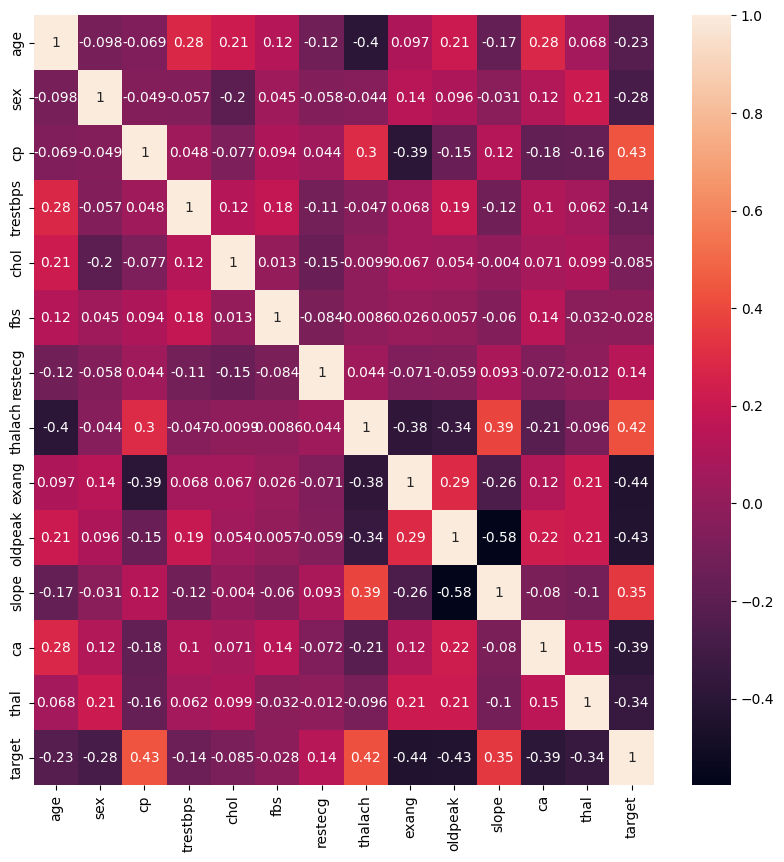

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

There's a positive corelation between cp, thalach(chest pain types, maximum heart rate achieved)

and

negative correlation with exang,oldpeak,ca (exercise induced angina,ST depression induced by exercise relative to rest,number of major vessels colored by flourosopy)

## Null values

In [13]:
df.isnull().values.any()

False

In [14]:
df.isna().values.any()

False

In [15]:
df.duplicated().values.any()

True

There are no null or wrong data. It seems there are duplicated rows.

In [21]:
df[df.duplicated(keep=False)].head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


Let's drop that row.

In [24]:
df = df.drop(df.index[163]).reset_index(drop=True)

In [26]:
df.duplicated().values.any()

False

## See the ditribution of each column

## age

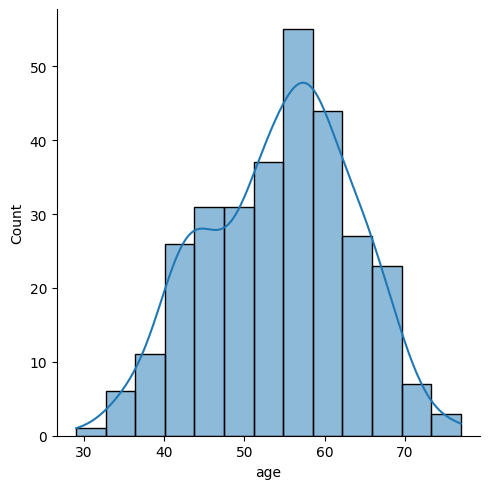

In [28]:
sns.displot(df,x='age',kde=True)

<Axes: xlabel='age'>

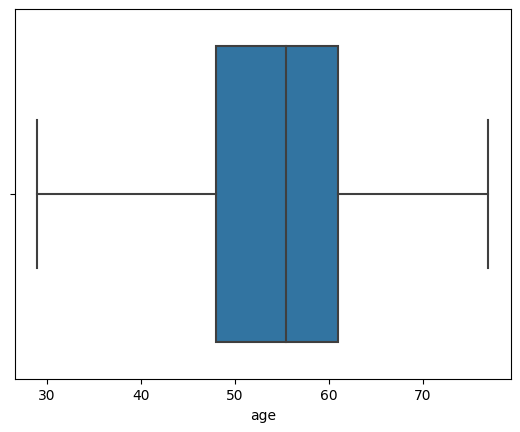

In [29]:
sns.boxplot(df,x='age')

In [30]:
age_skew = df['age'].skew()
age_kurt = df['age'].kurtosis()
print("skew is",age_skew, "kurtosis is",age_kurt)

skew is -0.2037432795959691 kurtosis is -0.5275122997069839


age distribution is normal. No outliers.

### sex

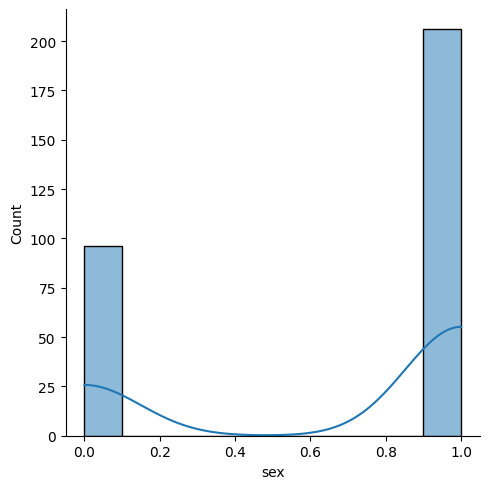

In [34]:
sns.displot(df,x='sex',kde=True)

There are more male samples in the data. gender column is ok.

### cp

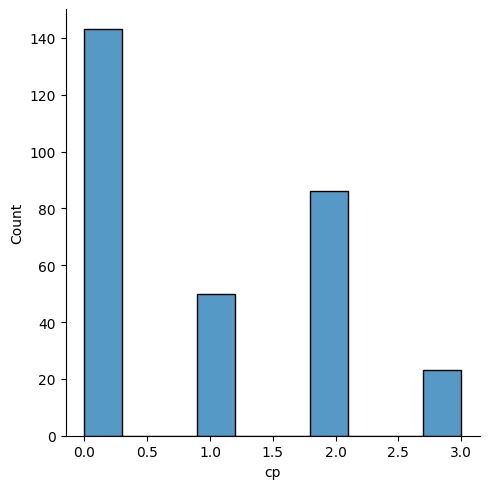

In [41]:
sns.displot(df,x='cp')

### trestbps

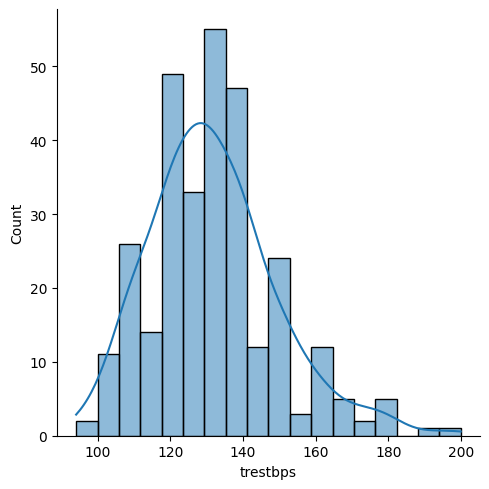

In [42]:
sns.displot(df,x='trestbps',kde=True)

<Axes: xlabel='trestbps'>

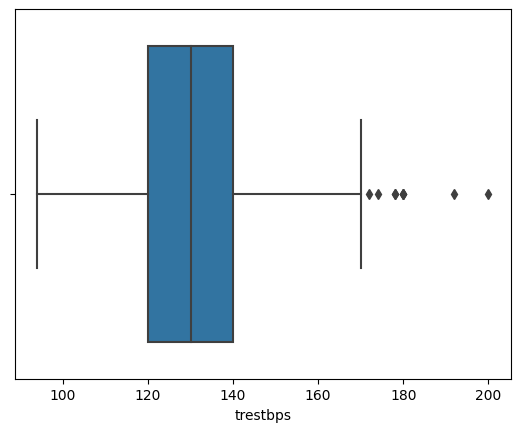

In [43]:
sns.boxplot(df,x='trestbps')

In [44]:
trestbps_skew = df['trestbps'].skew()
trestbps_kurt = df['trestbps'].kurtosis()
print("skew is",trestbps_skew, "kurtosis is",trestbps_kurt)

skew is 0.7165414326647318 kurtosis is 0.9229963552001497


We can see some outliers in trestbps. Though skew and kurtosis is not that bad. Since this can be a natural variance and can affect the target I won't clean this.

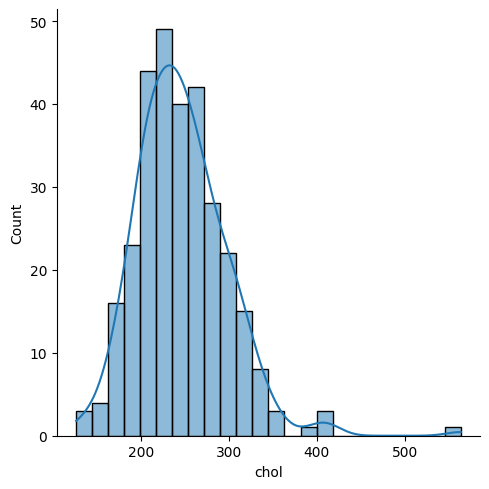

In [45]:
sns.displot(df,x='chol',kde=True)

<Axes: xlabel='chol'>

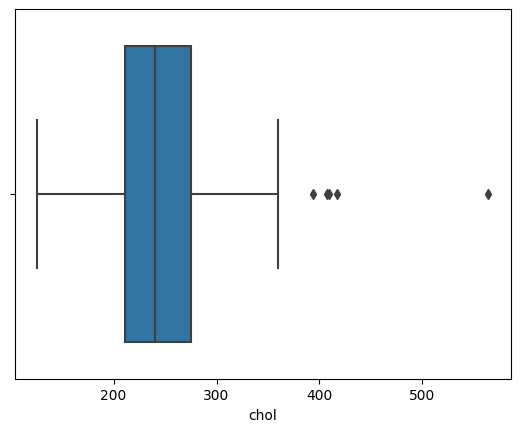

In [46]:
sns.boxplot(df,x='chol')

We can see some outliers in serum cholestoral as well. This can be a error in data collection or a natural variance. Since there are not much I'll let them as there are.

### Other columns

-- fbs
-- restecg
-- thalach
-- exang
-- oldpeak
-- slope
-- ca
-- thal
-- target


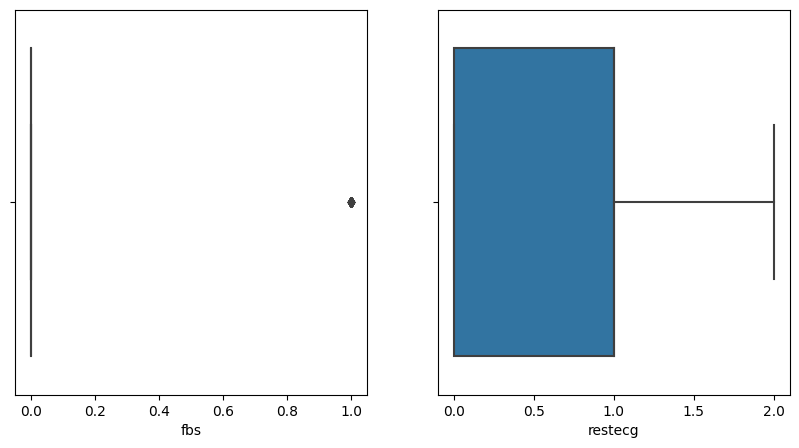

In [65]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(df,x='fbs')
plt.subplot(1,2,2)
sns.boxplot(df,x='restecg')
plt.show()

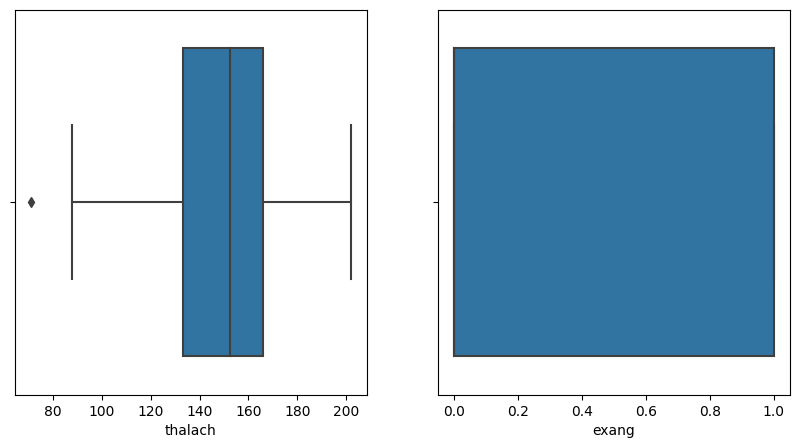

In [66]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(df,x='thalach')
plt.subplot(1,2,2)
sns.boxplot(df,x='exang')
plt.show()

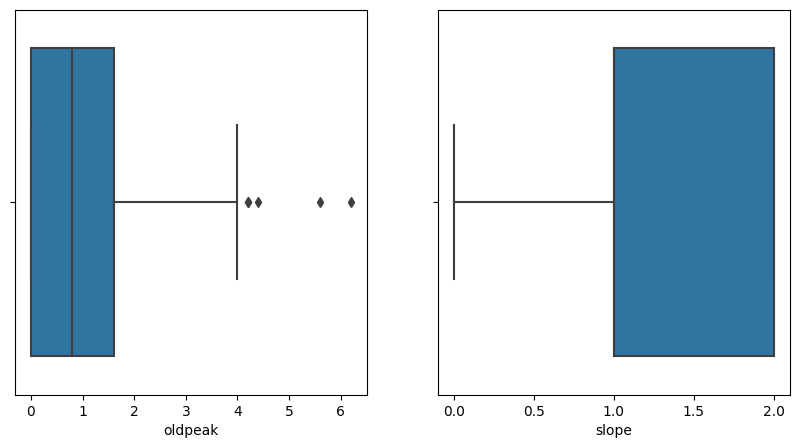

In [67]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(df,x='oldpeak')
plt.subplot(1,2,2)
sns.boxplot(df,x='slope')
plt.show()

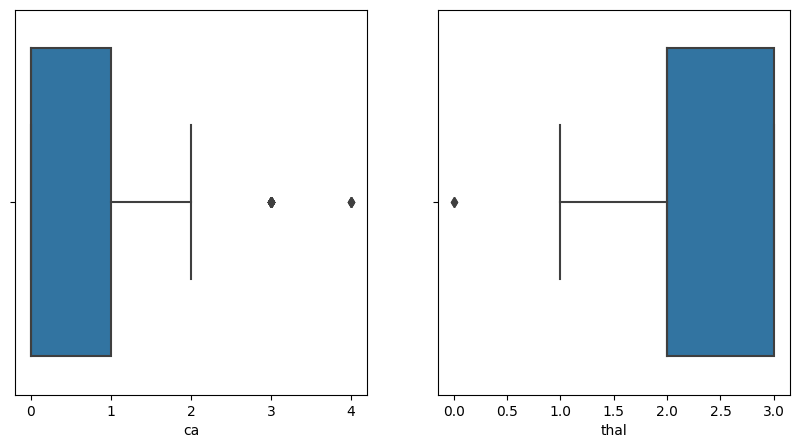

In [71]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(df,x='ca')
plt.subplot(1,2,2)
sns.boxplot(df,x='thal')

plt.show()

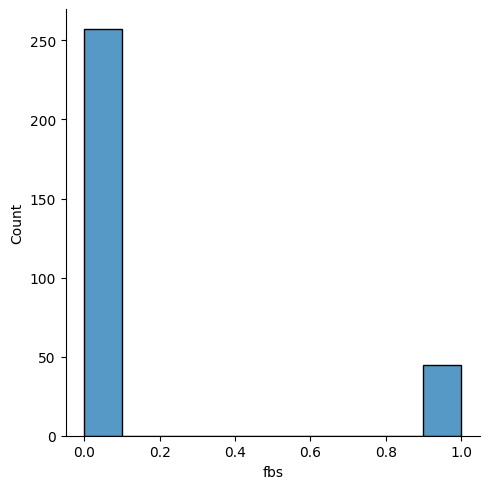

In [72]:
sns.displot(df,x='fbs')
# fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)

ca: number of major vessels (0-3) colored by flourosopy
can only have 0-3 values

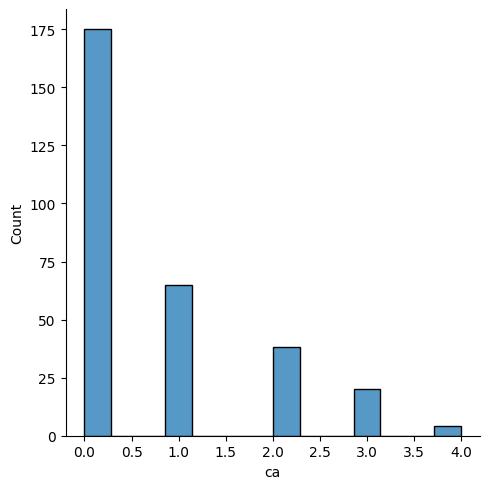

In [74]:
sns.displot(df,x='ca')

data has some values beyond that.

* need to clean

thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

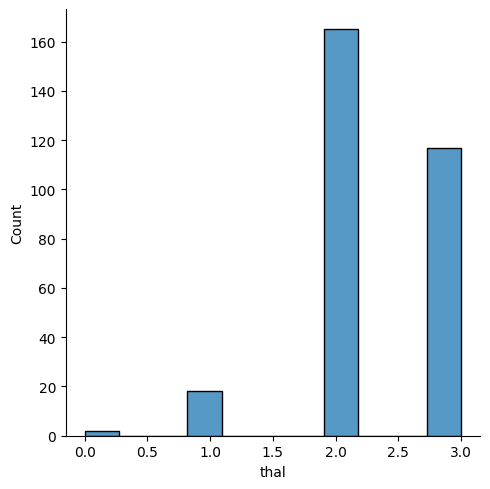

In [76]:
sns.displot(df,x='thal')

I'm guessing this 0 is a error since this column have only 3 values. 1,2,3

## Important visualizations

<Axes: xlabel='sex', ylabel='target'>

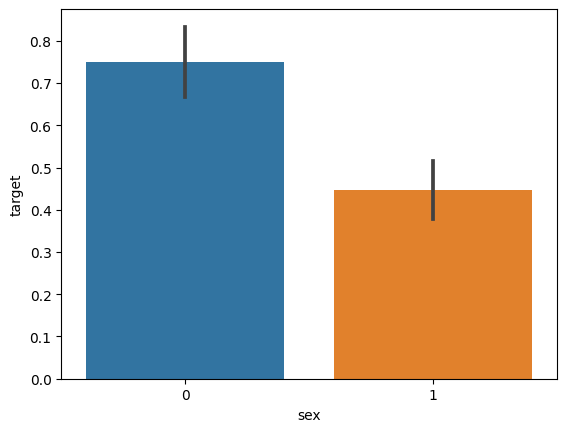

In [84]:
sns.barplot(df,x='sex',y='target')

According to the majority of people who have heart disease are female.

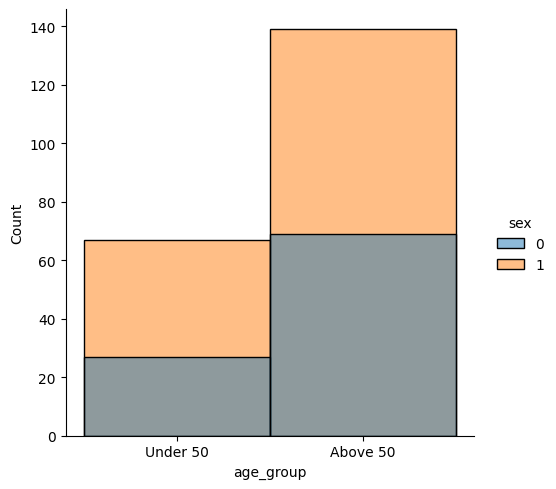

In [141]:
dfc = df.copy()

dfc['age_group'] = pd.cut(dfc['age'], bins=[0, 50, float('inf')], labels=['Under 50', 'Above 50'])

sns.displot(dfc,x='age_group',hue='sex')


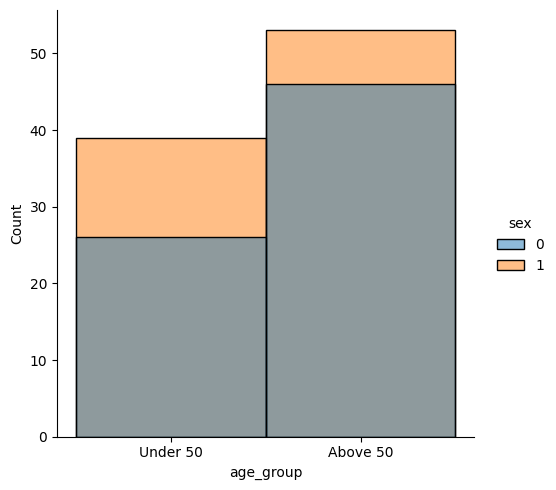

In [148]:
sns.displot(dfc[dfc['target']==1],x='age_group',hue='sex')

In [147]:
values = dfc['age_group'].value_counts().values
target_1_values = dfc[dfc['target']==1]['age_group'].value_counts().values
print(values,target_1_values)

under_50_prob = target_1_values[0] / values[0] *100
over_50_prob = target_1_values[1] / values[1] *100

print(under_50_prob, "% of under 50 people have a heart disease")
print(over_50_prob, "% of over 50 people have a heart disease")

[208  94] [99 65]
47.59615384615385 % of under 50 people have a heart disease
69.14893617021278 % of over 50 people have a heart disease


over 50 people have more chance of heart disease.

## Cleaning outliers

In [154]:
dfcc = dfc.copy()

dfcc = dfcc[dfcc['ca']<4]
dfcc.shape

(298, 15)

## Preprocessing

* shuffle dataset
* split to training,eval,test

In [232]:
dff = df.copy()

dff = dff.sample(frac=1).reset_index(drop=True)
dff.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0
1,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
2,42,0,2,120,209,0,1,173,0,0.0,1,0,2,1
3,59,1,0,138,271,0,0,182,0,0.0,2,0,2,1
4,49,1,2,118,149,0,0,126,0,0.8,2,3,2,0
5,58,0,0,170,225,1,0,146,1,2.8,1,2,1,0
6,49,1,2,120,188,0,1,139,0,2.0,1,3,3,0
7,46,1,2,150,231,0,1,147,0,3.6,1,0,2,0
8,58,1,0,146,218,0,1,105,0,2.0,1,1,3,0
9,54,1,0,140,239,0,1,160,0,1.2,2,0,2,1


In [233]:
num_of_rows = len(dff.index)
num_of_rows_to_75 = round(num_of_rows * 0.75)
num_of_rows_to_95 = round(num_of_rows * 0.95)


training_features = dff[0:num_of_rows_to_75]
eval_features = dff[num_of_rows_to_75:num_of_rows_to_95]
test_features = dff[num_of_rows_to_95:]

# labels
train_labels = training_features.pop('target')
eval_labels = eval_features.pop('target')
test_labels = test_features.pop('target')

test_labels.shape

(15,)

15 rows to test manualy.

In [234]:
training_features.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']

## Build the model



In [345]:
normalization_layer = layers.Normalization(axis=-1)
normalization_layer.adapt(np.array(training_features))

In [346]:
linear_model = keras.Sequential([
    layers.Flatten(input_shape=(13,)),
    normalization_layer,
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(64,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

In [347]:
linear_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [348]:
linear_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 13)                0         
                                                                 
 normalization_6 (Normalizat  (None, 13)               27        
 ion)                                                            
                                                                 
 dense_25 (Dense)            (None, 64)                896       
                                                                 
 dense_26 (Dense)            (None, 64)                4160      
                                                                 
 dense_27 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,148
Trainable params: 5,121
Non-trainable params: 27
___________________________________________________

In [349]:
EPOCHS = 1000

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=15)

history = linear_model.fit(
    training_features,
    train_labels,
    epochs=EPOCHS,
    verbose=0,
    callbacks=[early_stopping]
)

In [350]:
history.history['loss'][-1]

0.00194762391038239

In [353]:
history.history['accuracy'][-1]

1.0

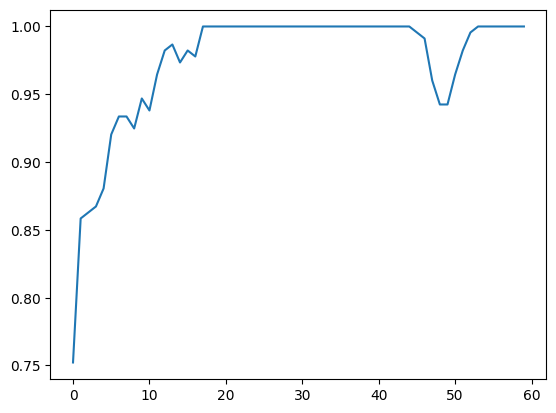

In [354]:
plt.plot(history.history['accuracy'])
plt.xLabel='epoch'
plt.yLabel='accuracy'
plt.show()

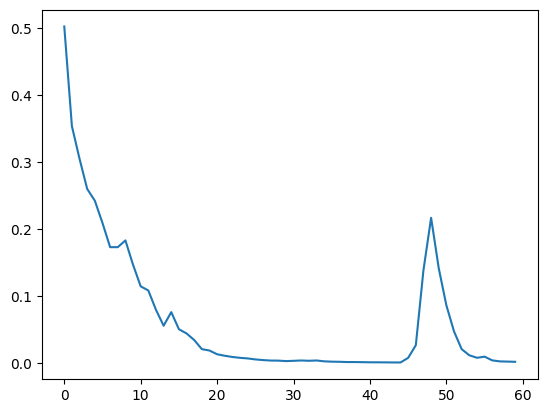

In [355]:
plt.plot(history.history['loss'])
plt.xLabel='epoch'
plt.yLabel='loss'
plt.show()

In [356]:
eval_loss, eval_acc = linear_model.evaluate(eval_features,eval_labels)

2/2 [==============================] - 0s 9ms/step - loss: 1.5758 - accuracy: 0.7377


In [357]:
linear_model.save('heart_attack_predic_model.h5')

In [358]:
model = keras.models.load_model('heart_attack_predic_model.h5')

In [359]:
test_x = test_features.copy()
test_y = test_labels.copy()
test_x.reset_index(drop=True,inplace=True)
test_y.reset_index(drop=True,inplace=True)

below is script that you can enter the index of the test data to predict and compare the results.

In [378]:
def manual_test(index):
  test = np.array([test_x.loc[index]])
  preds = linear_model.predict(test)
  print(preds[0][-1])
  pred_res = round(preds[0][-1])
  actual_res = test_y.loc[index]
  print("predicted:",pred_res,"\nactual result is",actual_res)

index = input("pick a index below 15:  ")
manual_test(int(index))

pick a index below 15:  14
1/1 [==============================] - 0s 38ms/step
0.98509175
predicted: 1 
actual result is 1


13 out of 15 tests were correct predictions. That means 86% accuracy.